# PROJECT AIT 664

#### IMPORT ALL THE NECCESARY LIBRARIES

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning,UndefinedMetricWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

#### READ THE EXCEL TO DATAFRAME

In [2]:
# display and set working/data directory
os.getcwd()
os.chdir(r'C:\\Users\\Dheeraj\\Downloads\\Studies\\Semester 3\\AIT 664\\Project\\Final Package\\Code\\DATASET') 
telecom_df = pd.read_csv('encoded_data_CSV.csv')

In [3]:
# Print the rows of the DataFrame
telecom_df

,Customer.ID,Gender,Age,Married,Number.of.Dependents,City,Zip.Code,Latitude,Longitude,Number.of.Referrals,...,Payment.Method,Monthly.Charge,Total.Charges,Total.Refunds,Total.Extra.Data.Charges,Total.Long.Distance.Charges,Total.Revenue,Customer.Status,Churn.Category,Churn.Reason
0,0002-ORFBO,0,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,1,65.60,593.30,0.00,0,381.51,974.81,2,3,14
1,0003-MKNFE,1,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,1,-4.00,542.40,38.33,10,96.21,610.28,2,3,14
2,0004-TLHLJ,1,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,0,73.90,280.85,0.00,0,134.60,415.45,0,1,2
3,0011-IGKFF,1,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,0,98.00,1237.85,0.00,0,361.66,1599.51,0,2,19
4,0013-EXCHZ,0,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,1,83.90,267.40,0.00,0,22.14,289.54,0,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,20,0,0,La Mesa,91941,32.759327,-116.997260,0,...,1,55.15,742.90,0.00,0,606.84,1349.74,2,3,14
7039,9992-RRAMN,1,40,1,0,Riverbank,95367,37.734971,-120.954271,1,...,0,85.10,1873.70,0.00,0,356.40,2230.10,0,2,19
7040,9992-UJOEL,1,22,0,0,Elk,95432,39.108252,-123.645121,0,...,1,50.30,92.75,0.00,0,37.24,129.99,1,3,14
7041,9993-LHIEB,1,21,1,0,Solana Beach,92075,33.001813,-117.263628,5,...,1,67.85,4627.65,0.00,0,142.04,4769.69,2,3,14


In [4]:
# Get and print the column names
print("Column names:", telecom_df.columns.tolist())

Column names: ['Customer.ID', 'Gender', 'Age', 'Married', 'Number.of.Dependents', 'City', 'Zip.Code', 'Latitude', 'Longitude', 'Number.of.Referrals', 'Tenure.in.Months', 'Offer', 'Phone.Service', 'Avg.Monthly.Long.Distance.Charges', 'Multiple.Lines', 'Internet.Service', 'Internet.Type', 'Avg.Monthly.GB.Download', 'Online.Security', 'Online.Backup', 'Device.Protection.Plan', 'Premium.Tech.Support', 'Streaming.TV', 'Streaming.Movies', 'Streaming.Music', 'Unlimited.Data', 'Contract', 'Paperless.Billing', 'Payment.Method', 'Monthly.Charge', 'Total.Charges', 'Total.Refunds', 'Total.Extra.Data.Charges', 'Total.Long.Distance.Charges', 'Total.Revenue', 'Customer.Status', 'Churn.Category', 'Churn.Reason']


There are 2 target variables :
1. Customer Status
2. Churn Category

For both the target variables, the models are trained and the best model will be selected for further studies

There are some columns which would not contribute to the model such as {'Customer.ID', 'City', 'Latitude', 'Longitude', 'Churn.Reason'}, therefore dropping these columns is neccessary before training the models.

#### BUILDING THE MODELS

In [5]:
def evaluate_models(dataframe, target_variable):
    
    # Features and target
    X = dataframe.drop(target_variable, axis=1)
    y = dataframe[target_variable]

    # Train-test split (70/30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'k-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Artificial Neural Network': MLPClassifier(random_state=42) 
    }

    # Initialize a DataFrame to store the metrics for each model
    metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'y_test', 'y_pred', 'Confusion Matrix'])

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Get precision, recall, and F1-score for each class (average='weighted' for weighted average across classes)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Add to the DataFrame
        metrics_df = metrics_df.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score,
            'y_test': y_test,
            'y_pred': y_pred,
            'Confusion Matrix': conf_matrix
        }, ignore_index=True)

    return X, metrics_df, X_test_scaled, y_test, models


In [6]:
# Function to plot model metrics
def plot_model_metrics(metrics_df):
    metrics_df.plot(x='Model', kind='bar', figsize=(12, 6))
    plt.title('Comparison of ML Models')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [7]:
# Function to find the best model based on custom score and retrieve its results
def find_best_model(metrics_df, models, X_test_scaled):
    # Add a custom score (average of Accuracy, Precision, Recall, F1-Score)
    metrics_df['Custom_Score'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean(axis=1)

    # Find the model with the highest custom score
    best_custom = metrics_df.loc[metrics_df['Custom_Score'].idxmax(), 'Model']
    
    # Retrieve the best model from the models dictionary
    best_model = models[best_custom]
    
    # Get predictions from the best model
    y_pred = best_model.predict(X_test_scaled)
    
    # Output the best model based on custom score
    print(f"The best model based on a custom score is: {best_custom}")

    return best_model, y_pred

In [8]:
# Function to plot confusion matrix of all the models
def plot_confusion_matrix(conf_matrix, model_name,xticklabels, yticklabels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=xticklabels, yticklabels=yticklabels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of {model_name}")
    plt.show()

#### MODEL FOR TARGET VARIABLE CUSTOMER STATUS

Customer Status has 3 categorties and they have labeled to categorical variable :
1. Churned - 0
2. Joined - 1  
3. Stayed - 2

In [9]:
# Remove specific columns from the DataFrame
columns_to_drop = ['Customer.ID', 'City', 'Latitude', 'Longitude', 'Churn.Category' , 'Churn.Reason']

# Create a new DataFrame without the specified columns
telecom_df_customer = telecom_df.drop(columns=columns_to_drop)

In [10]:
telecom_df_customer

,Gender,Age,Married,Number.of.Dependents,Zip.Code,Number.of.Referrals,Tenure.in.Months,Offer,Phone.Service,Avg.Monthly.Long.Distance.Charges,...,Contract,Paperless.Billing,Payment.Method,Monthly.Charge,Total.Charges,Total.Refunds,Total.Extra.Data.Charges,Total.Long.Distance.Charges,Total.Revenue,Customer.Status
0,0,37,1,0,93225,2,9,0,1,42.39,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,2
1,1,46,0,0,91206,0,9,0,1,10.69,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,2
2,1,50,0,0,92627,0,4,5,1,33.65,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,94553,1,13,4,1,27.82,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,93010,3,3,0,1,7.38,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,20,0,0,91941,0,13,4,1,46.68,...,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,2
7039,1,40,1,0,95367,1,22,4,1,16.20,...,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
7040,1,22,0,0,95432,0,2,5,1,18.62,...,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1
7041,1,21,1,0,92075,5,67,1,1,2.12,...,2,0,1,67.85,4627.65,0.00,0,142.04,4769.69,2


In [11]:
target_variable = 'Customer.Status'

# Model evaluation
X,metrics_df, X_test_scaled, y_test, models = evaluate_models(telecom_df_customer, target_variable)

In [12]:
metrics_df[['Model','Accuracy','Precision','Recall','F1-Score']]

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.818268,0.821252,0.818268,0.819600
1,Random Forest,0.836252,0.829042,0.836252,0.831127
2,Gradient Boosting,0.850450,0.844665,0.850450,0.846286
3,SVM,0.802650,0.796204,0.802650,0.796482
4,k-Nearest Neighbors,0.742073,0.743707,0.742073,0.740830
5,Naive Bayes,0.711311,0.771233,0.711311,0.728093
6,Artificial Neural Network,0.799811,0.799153,0.799811,0.799208


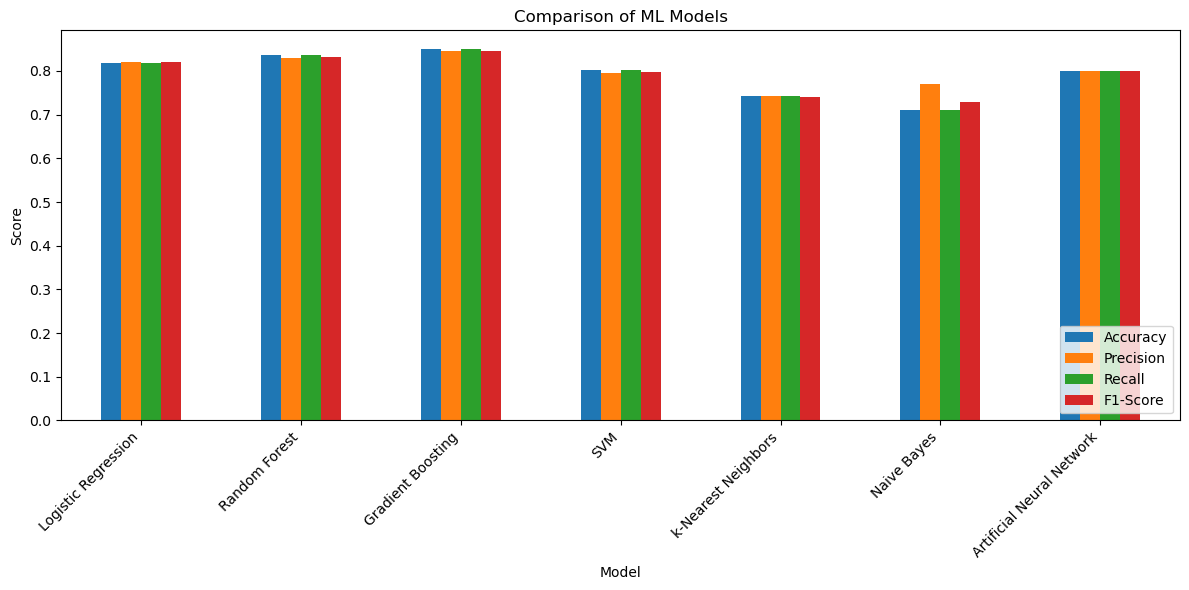

In [13]:
plot_model_metrics(metrics_df)

[[ 378   52  121]
 [  53   94    6]
 [ 148    4 1257]]


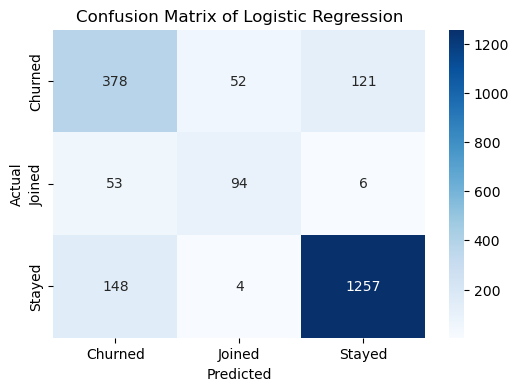

In [14]:
# Plot confusion matrix for the first row in metrics_df
print(metrics_df.iloc[0]['Confusion Matrix'])
plot_confusion_matrix(metrics_df.iloc[0]['Confusion Matrix'], metrics_df.iloc[0]['Model'], ["Churned", "Joined", "Stayed"], ["Churned", "Joined", "Stayed"])

[[ 350   36  165]
 [  63   89    1]
 [  81    0 1328]]


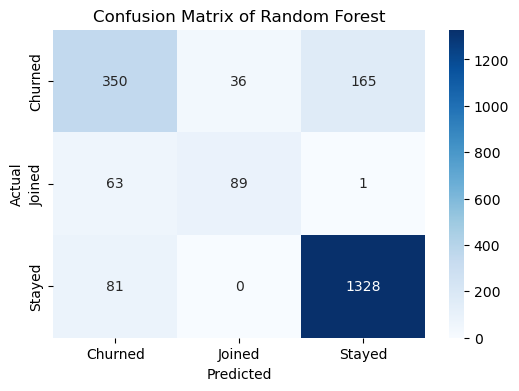

In [15]:
# Plot confusion matrix for the second row in metrics_df
print(metrics_df.iloc[1]['Confusion Matrix'])
plot_confusion_matrix(metrics_df.iloc[1]['Confusion Matrix'], metrics_df.iloc[1]['Model'], ["Churned", "Joined", "Stayed"], ["Churned", "Joined", "Stayed"])

[[ 365   33  153]
 [  55   98    0]
 [  75    0 1334]]


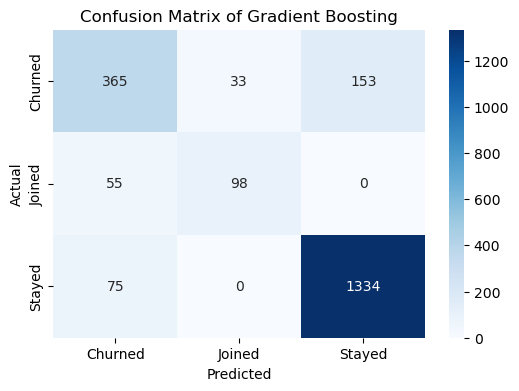

In [16]:
# Plot confusion matrix for the third row in metrics_df
print(metrics_df.iloc[2]['Confusion Matrix'])
plot_confusion_matrix(metrics_df.iloc[2]['Confusion Matrix'], metrics_df.iloc[2]['Model'], ["Churned", "Joined", "Stayed"], ["Churned", "Joined", "Stayed"])

[[ 398   21  132]
 [  71   43   39]
 [ 135   19 1255]]


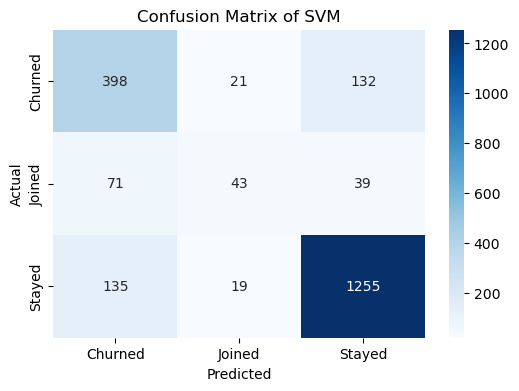

In [17]:
# Plot confusion matrix for the fourth row in metrics_df
print(metrics_df.iloc[3]['Confusion Matrix'])
plot_confusion_matrix(metrics_df.iloc[3]['Confusion Matrix'], metrics_df.iloc[3]['Model'], ["Churned", "Joined", "Stayed"], ["Churned", "Joined", "Stayed"])

[[ 369   27  155]
 [  60   41   52]
 [ 216   35 1158]]


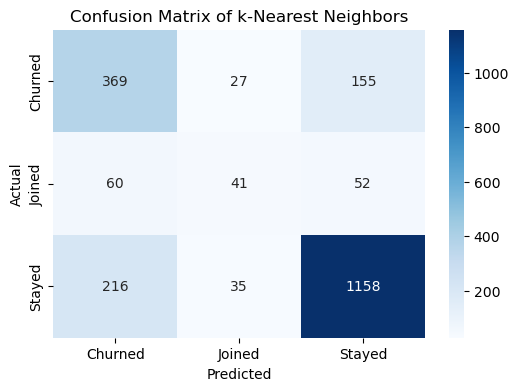

In [18]:
# Plot confusion matrix for the fifth row in metrics_df
print(metrics_df.iloc[4]['Confusion Matrix'])
plot_confusion_matrix(metrics_df.iloc[4]['Confusion Matrix'], metrics_df.iloc[4]['Model'], ["Churned", "Joined", "Stayed"], ["Churned", "Joined", "Stayed"])

[[ 306  158   87]
 [  11  140    2]
 [ 318   34 1057]]


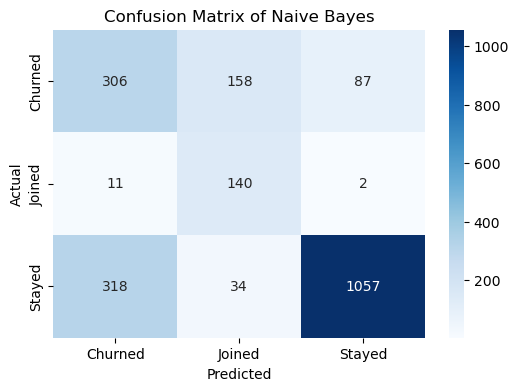

In [19]:
# Plot confusion matrix for the sixth row in metrics_df
print(metrics_df.iloc[5]['Confusion Matrix'])
plot_confusion_matrix(metrics_df.iloc[5]['Confusion Matrix'], metrics_df.iloc[5]['Model'], ["Churned", "Joined", "Stayed"], ["Churned", "Joined", "Stayed"])

[[ 370   40  141]
 [  56   75   22]
 [ 147   17 1245]]


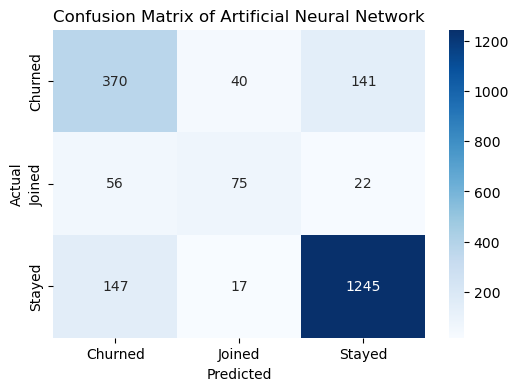

In [20]:
# Plot confusion matrix for the seventh row in metrics_df
print(metrics_df.iloc[6]['Confusion Matrix'])
plot_confusion_matrix(metrics_df.iloc[6]['Confusion Matrix'], metrics_df.iloc[6]['Model'], ["Churned", "Joined", "Stayed"], ["Churned", "Joined", "Stayed"])

In [21]:
# Get the best model and its predictions
best_model, y_pred = find_best_model(metrics_df, models, X_test_scaled)

The best model based on a custom score is: Gradient Boosting


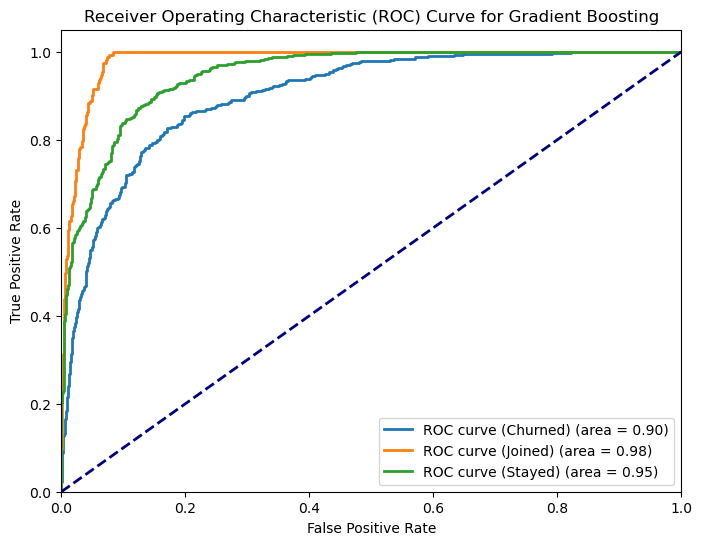

In [22]:
# Get predicted probabilities for each class
best_model_gb=best_model
y_pred_prob_gb = best_model_gb.predict_proba(X_test_scaled)

# Define custom class labels
class_labels = ["Churned", "Joined", "Stayed"]

# Calculate the fpr and tpr for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_model_gb.classes_)):
    fpr_gb, tpr_gb, _ = roc_curve(y_test == best_model_gb.classes_[i], y_pred_prob_gb[:, i])
    roc_auc_gb = auc(fpr_gb, tpr_gb)
    plt.plot(fpr_gb, tpr_gb, lw=2, label=f'ROC curve ({class_labels[i]}) (area = {roc_auc_gb:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

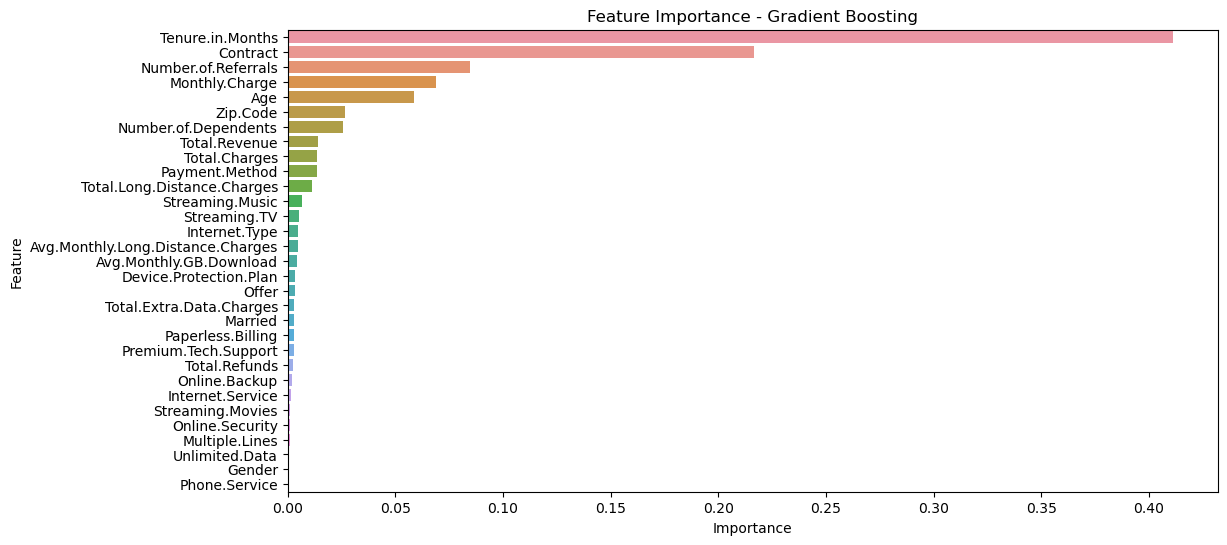

In [23]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Assuming 'X' is your feature DataFrame
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance overall
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Gradient Boosting")
plt.show()

In [24]:
feature_importance_df

,Feature,Importance
6,Tenure.in.Months,0.411376
22,Contract,0.216757
5,Number.of.Referrals,0.084911
25,Monthly.Charge,0.069050
1,Age,0.058615
4,Zip.Code,0.026531
3,Number.of.Dependents,0.025841
30,Total.Revenue,0.014172
26,Total.Charges,0.013669
24,Payment.Method,0.013598


#### RETENTION STRATEGY

In [25]:
# Load customer data
customer_data = pd.read_csv('encoded_data_CSV.csv')

# Get predictions from the Gradient Boosting model
customer_data['churn_prob'] = best_model_gb.predict_proba(customer_data[X.columns])[:, 0]

# Identify customers at high risk of churning
at_risk_customers = customer_data[customer_data['churn_prob'] >= 0.9]

# Get the top 5 most important features
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Define retention strategy functions
def offer_loyalty_discounts(segment):
    return f"Offer loyalty discounts to {len(segment)} customers"

def offer_contract_renewal(segment):
    return f"Offer contract renewal incentives to {len(segment)} customers"

def offer_referral_incentives(segment):
    return f"Offer referral incentives to {len(segment)} customers"

def offer_plan_adjustments(segment):
    return f"Offer plan adjustments to {len(segment)} customers"

def offer_age_based_promotions(segment):
    return f"Offer age-based promotions to {len(segment)} customers"

# Define retention strategies based on feature importances
retention_strategies = {
    'Tenure.in.Months': offer_loyalty_discounts,
    'Contract': offer_contract_renewal,
    'Number.of.Referrals': offer_referral_incentives,
    'Monthly.Charge': offer_plan_adjustments,
    'Age': offer_age_based_promotions
}

# Initialize a list to store the retention strategies
retention_strategies_list = []

# Implement retention strategies for each segment
for feature in top_features:
    for value in at_risk_customers[feature].unique():
        segment = at_risk_customers[(at_risk_customers[feature] == value) & (at_risk_customers['churn_prob'] >= 0.7)]
        if not segment.empty:
            retention_strategy = retention_strategies[feature](segment)
            retention_strategies_list.append({
                'Feature': feature,
                'Value': value,
                'Retention Strategy': retention_strategy
            })

# Convert the retention strategies list to a DataFrame
retention_strategies_df = pd.DataFrame(retention_strategies_list)

In [26]:
retention_strategies_df[retention_strategies_df['Feature'] == 'Tenure.in.Months']

,Feature,Value,Retention Strategy
0,Tenure.in.Months,31.0,Offer loyalty discounts to 1 customers
1,Tenure.in.Months,17.0,Offer loyalty discounts to 2 customers
2,Tenure.in.Months,50.0,Offer loyalty discounts to 1 customers
3,Tenure.in.Months,19.0,Offer loyalty discounts to 1 customers
4,Tenure.in.Months,12.0,Offer loyalty discounts to 2 customers
5,Tenure.in.Months,27.0,Offer loyalty discounts to 1 customers
6,Tenure.in.Months,45.0,Offer loyalty discounts to 1 customers
7,Tenure.in.Months,36.0,Offer loyalty discounts to 1 customers
8,Tenure.in.Months,32.0,Offer loyalty discounts to 2 customers
9,Tenure.in.Months,4.0,Offer loyalty discounts to 1 customers


In [27]:
retention_strategies_df[retention_strategies_df['Feature'] == 'Contract']

,Feature,Value,Retention Strategy
25,Contract,0.0,Offer contract renewal incentives to 33 customers


In [28]:
retention_strategies_df[retention_strategies_df['Feature'] == 'Number.of.Referrals']

,Feature,Value,Retention Strategy
26,Number.of.Referrals,1.0,Offer referral incentives to 10 customers
27,Number.of.Referrals,0.0,Offer referral incentives to 23 customers


In [29]:
retention_strategies_df[retention_strategies_df['Feature'] == 'Monthly.Charge']

,Feature,Value,Retention Strategy
28,Monthly.Charge,83.85,Offer plan adjustments to 1 customers
29,Monthly.Charge,24.80,Offer plan adjustments to 1 customers
30,Monthly.Charge,51.50,Offer plan adjustments to 1 customers
31,Monthly.Charge,103.70,Offer plan adjustments to 1 customers
32,Monthly.Charge,89.95,Offer plan adjustments to 1 customers
33,Monthly.Charge,98.10,Offer plan adjustments to 1 customers
34,Monthly.Charge,76.10,Offer plan adjustments to 1 customers
35,Monthly.Charge,89.30,Offer plan adjustments to 1 customers
36,Monthly.Charge,91.95,Offer plan adjustments to 1 customers
37,Monthly.Charge,104.90,Offer plan adjustments to 1 customers


In [30]:
retention_strategies_df[retention_strategies_df['Feature'] == 'Age']

,Feature,Value,Retention Strategy
61,Age,64.0,Offer age-based promotions to 2 customers
62,Age,36.0,Offer age-based promotions to 1 customers
63,Age,28.0,Offer age-based promotions to 1 customers
64,Age,49.0,Offer age-based promotions to 2 customers
65,Age,67.0,Offer age-based promotions to 2 customers
66,Age,26.0,Offer age-based promotions to 2 customers
67,Age,41.0,Offer age-based promotions to 2 customers
68,Age,74.0,Offer age-based promotions to 1 customers
69,Age,76.0,Offer age-based promotions to 1 customers
70,Age,46.0,Offer age-based promotions to 3 customers


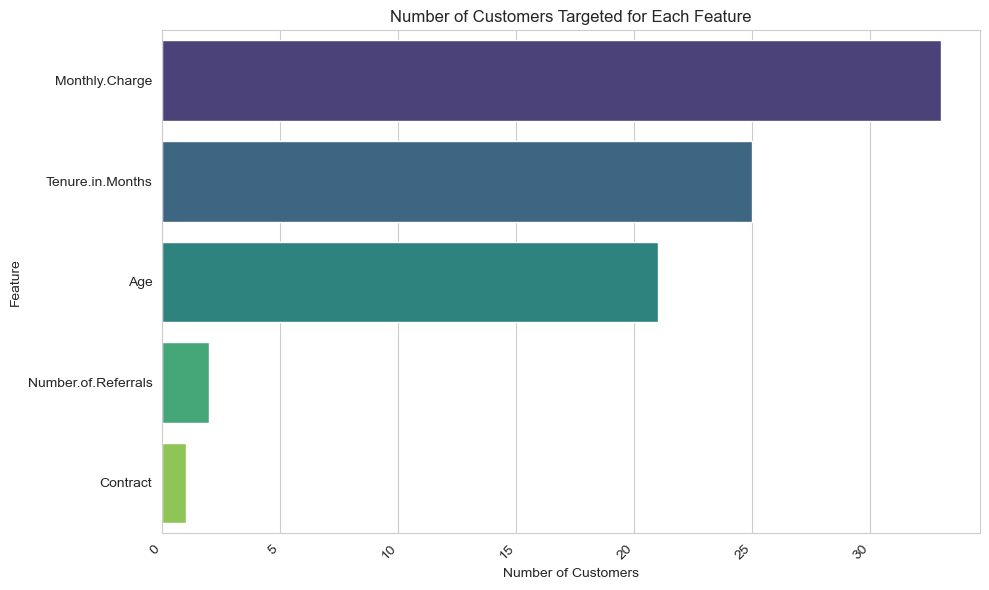

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Count the number of customers for each retention strategy and feature
strategy_counts = retention_strategies_df['Feature'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=strategy_counts.values, y=strategy_counts.index, palette="viridis")
plt.title('Number of Customers Targeted for Each Feature')
plt.xlabel('Number of Customers')
plt.ylabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### MODEL FOR TARGET VARIABLE CHURN CATEGORY

Churn Category has 5 categorties and they have labeled to categorical variable :

1. Attitude - 0
2. Competitor - 1
3. Dissatisfaction - 2
4. N/A - 3
5. Other - 4
6. Price - 5

In [32]:
# Remove specific columns from the DataFrame
columns_to_drop = ['Customer.ID', 'City', 'Latitude', 'Longitude','Churn.Reason','Customer.Status']

telecom_df_churn = telecom_df[telecom_df['Customer.Status']==0]

# Create a new DataFrame without the specified columns
telecom_df_churn = telecom_df_churn.drop(columns=columns_to_drop)

In [33]:
telecom_df_churn

,Gender,Age,Married,Number.of.Dependents,Zip.Code,Number.of.Referrals,Tenure.in.Months,Offer,Phone.Service,Avg.Monthly.Long.Distance.Charges,...,Contract,Paperless.Billing,Payment.Method,Monthly.Charge,Total.Charges,Total.Refunds,Total.Extra.Data.Charges,Total.Long.Distance.Charges,Total.Revenue,Churn.Category
2,1,50,0,0,92627,0,4,5,1,33.65,...,0,1,0,73.90,280.85,0.0,0,134.60,415.45,1
3,1,78,1,0,94553,1,13,4,1,27.82,...,0,1,0,98.00,1237.85,0.0,0,361.66,1599.51,2
4,0,75,1,0,93010,3,3,0,1,7.38,...,0,1,1,83.90,267.40,0.0,0,22.14,289.54,2
18,1,79,0,0,94015,0,45,0,1,10.67,...,1,0,1,62.70,2791.50,0.0,0,480.15,3271.65,2
19,1,67,0,0,95037,0,1,0,0,0.00,...,0,1,0,25.10,25.10,0.0,0,0.00,25.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,79,0,0,92239,0,21,0,1,42.27,...,0,1,0,-1.00,2030.30,10.2,0,887.67,2907.77,2
7023,1,73,0,0,95636,0,9,0,1,10.04,...,0,1,0,83.85,790.15,0.0,0,90.36,880.51,2
7036,0,53,0,0,93628,0,1,5,1,42.09,...,0,1,1,70.15,70.15,0.0,0,42.09,112.24,1
7037,0,36,0,0,92028,0,4,0,1,2.01,...,0,0,0,20.95,85.50,0.0,0,8.04,93.54,1


In [34]:
target_variable = 'Churn.Category'

# Model evaluation
X,metrics_df, X_test_scaled, y_test, models = evaluate_models(telecom_df_churn, target_variable)

In [35]:
metrics_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.468806,0.388250,0.468806,0.363072
1,Random Forest,0.450980,0.309477,0.450980,0.332534
2,Gradient Boosting,0.443850,0.358055,0.443850,0.371909
3,SVM,0.477718,0.345686,0.477718,0.340186
4,k-Nearest Neighbors,0.393939,0.327315,0.393939,0.342161
5,Naive Bayes,0.336898,0.341925,0.336898,0.317028
6,Artificial Neural Network,0.401070,0.350964,0.401070,0.368235


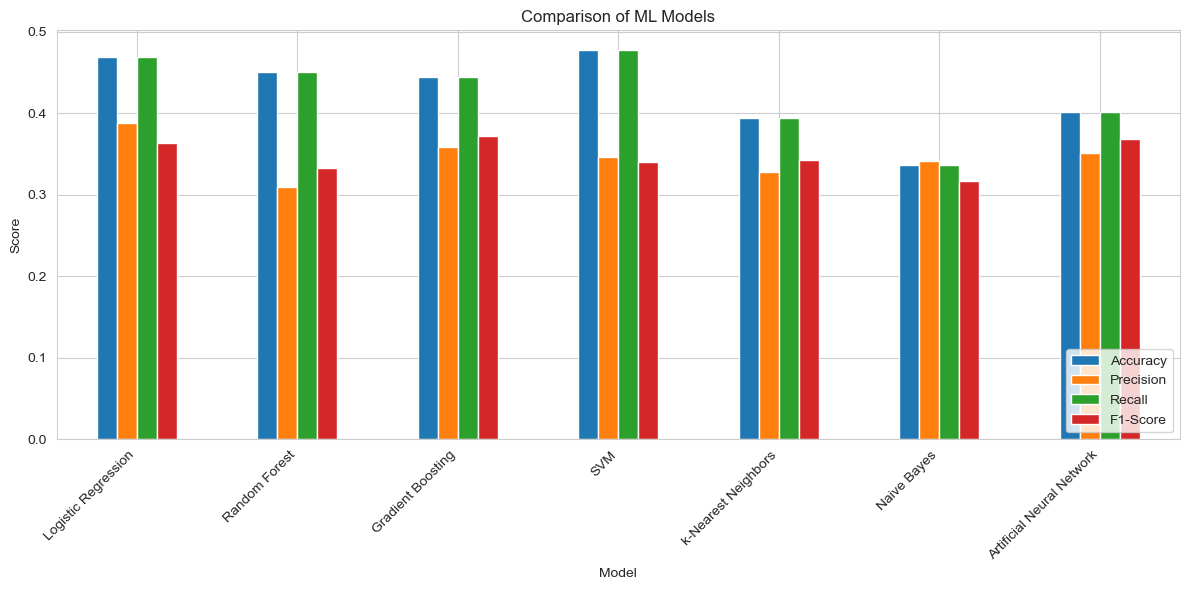

In [36]:
plot_model_metrics(metrics_df)

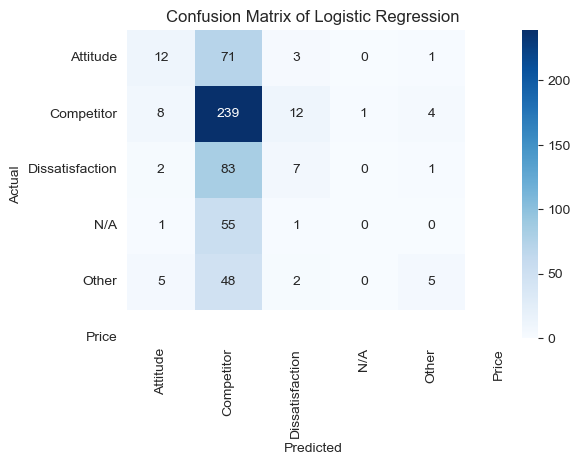

In [37]:
# Plot confusion matrix for row 1
plot_confusion_matrix(metrics_df.iloc[0]['Confusion Matrix'], metrics_df.iloc[0]['Model'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'])

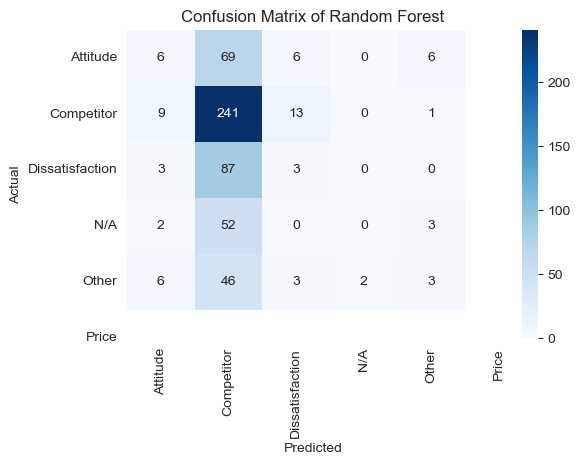

In [38]:
# Plot confusion matrix for row 2
plot_confusion_matrix(metrics_df.iloc[1]['Confusion Matrix'], metrics_df.iloc[1]['Model'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'])

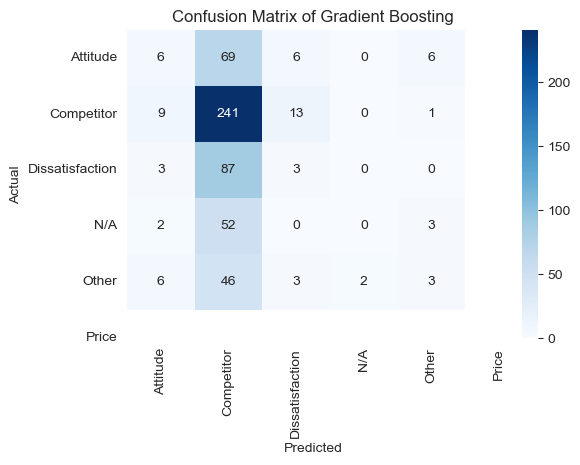

In [39]:
# Plot confusion matrix for row 3
plot_confusion_matrix(metrics_df.iloc[1]['Confusion Matrix'], metrics_df.iloc[2]['Model'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'])

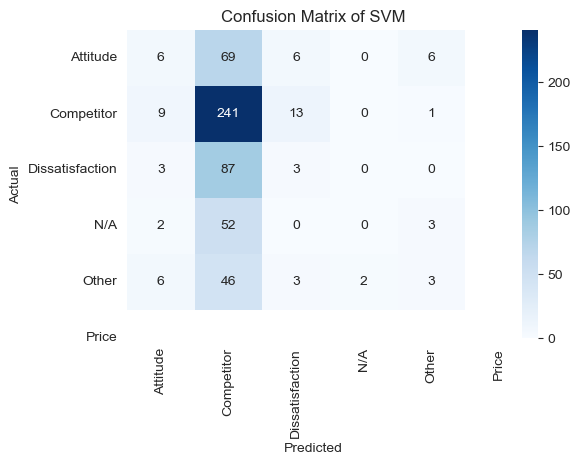

In [40]:
# Plot confusion matrix for row 4
plot_confusion_matrix(metrics_df.iloc[1]['Confusion Matrix'], metrics_df.iloc[3]['Model'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'])

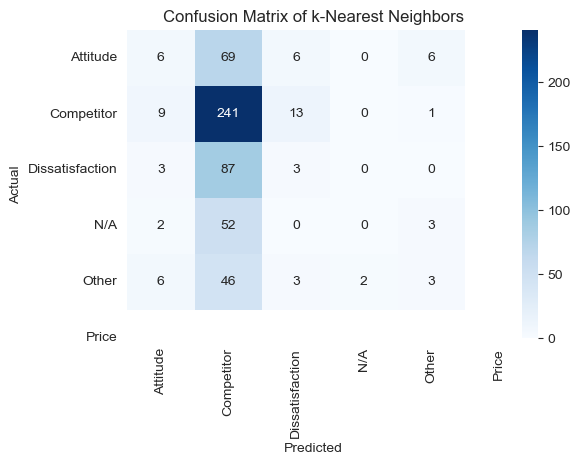

In [41]:
# Plot confusion matrix for row 5
plot_confusion_matrix(metrics_df.iloc[1]['Confusion Matrix'], metrics_df.iloc[4]['Model'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'])

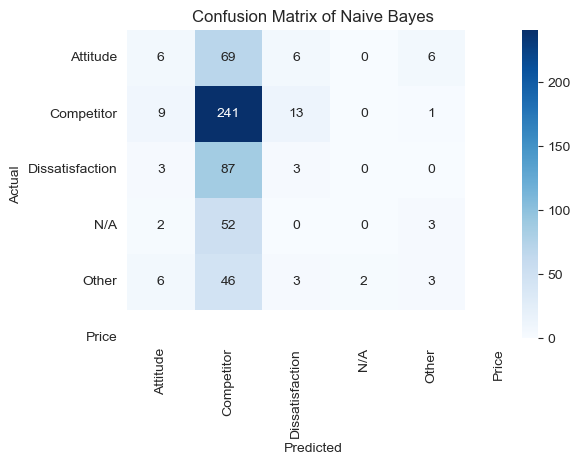

In [42]:
# Plot confusion matrix for row 6
plot_confusion_matrix(metrics_df.iloc[1]['Confusion Matrix'], metrics_df.iloc[5]['Model'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'])

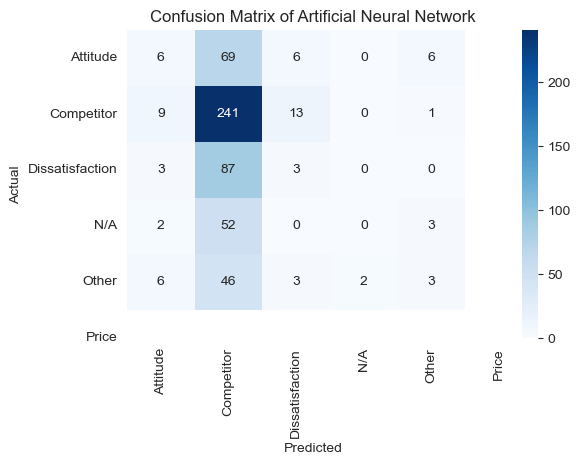

In [43]:
# Plot confusion matrix for row 7
plot_confusion_matrix(metrics_df.iloc[1]['Confusion Matrix'], metrics_df.iloc[6]['Model'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'], ['Attitude','Competitor','Dissatisfaction','N/A','Other','Price'])